# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## VERNINAS Hippolyte

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
from scipy.stats import norm, chi2, gaussian_kde

In [40]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [41]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [42]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [43]:
regions = list(df.region.unique())

In [44]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [45]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [46]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [47]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

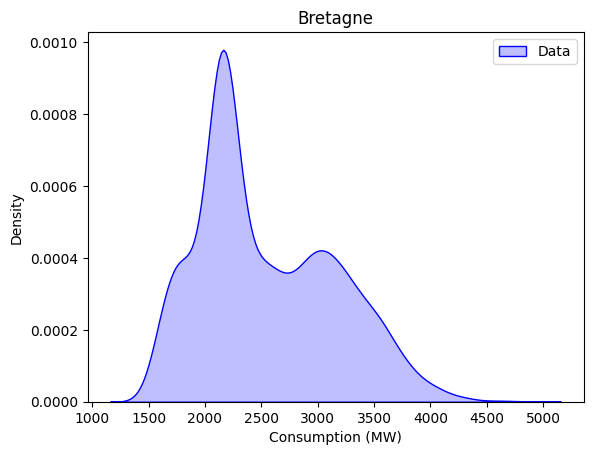

In [48]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

On a:

$$
\begin{aligned}
    b(\hat{\mu}) &= E(\hat{\mu}) - \mu \\
    &= E\left(\frac{1}{n}\sum_{i=1}^{n}x_i\right) - \mu \\
    &= \frac{1}{n}\sum_{i=1}^{n}E(x_i) - \mu \\
    &= \frac{1}{n}\sum_{i=1}^{n}\mu - \mu \\
    &= 0 \\
    \\
    E(\hat{\sigma^2}) &= E\left(\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\hat{\mu})^2\right) \\
    &= \frac{1}{n-1}\sum_{i=1}^{n}(E(x_i^2)-2E(x_i\hat{\mu})+E(\hat{\mu}^2)) \\
    &= \frac{1}{n-1}\sum_{i=1}^{n}\left(V(x_i)+E(x_i)^2-\frac{2}{n}\sum_{j=1}^{n}E(x_ix_j)+V(\hat{\mu})+E(\hat{\mu})^2\right) \\

    &= \frac{1}{n-1}\left(
    \sum_{i=1}^{n}\left(\sigma^2+\mu^2\right)
    -\frac{2}{n}\sum_{i=1}^{n}\sum_{j=1}^{n}(x_ix_j)
    +\sum_{i=1}^{n}\left(\sum_{j=1}^{n}\frac{1}{n^2}V(x_j)+\mu^2\right)
    \right) \\

    &= \frac{1}{n-1}\left(
    n\left(\sigma^2+\mu^2\right)
    -\frac{2}{n}\sum_{i=1}^{n}E(x_i^2) + \frac{2}{n}\sum_{i=1}^{n}\sum_{j\in[1,n]\backslash{i}}E(x_i)E(x_j)
    +n\left(\frac{\sigma^2}{n}+\mu^2\right)
    \right) \\

    &= \frac{1}{n-1}\left(
    n\left(\sigma^2+\mu^2\right)
    -2(\sigma^2+\mu^2) + 2(n-1)\mu^2
    +n\left(\frac{\sigma^2}{n}+\mu^2\right)
    \right) \\

    &= \frac{1}{n-1}((n-1)\sigma^2) \\
    &= \sigma^2
\end{aligned}
$$

Donc, 

$$
b(\hat{\sigma^2})=E(\hat{\sigma^2}) - \sigma^2 = 0
$$

Donc $\hat{\mu}$ et $\hat{\sigma^2}$ sont sans biais.

2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [49]:
df_bretagne = df[df.region == "Bretagne"]

moyenne = df_region.consumption.sum()/df_bretagne.consumption.count()
print(f"moyenne: {moyenne}")
variance = sum([(x-moyenne)**2 for x in df_bretagne.consumption])/(df_bretagne.consumption.count()-1)
print(f"variance: {variance}")


moyenne: 2546.536155666579
variance: 365956.01414481626


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [50]:
# Nombre d'observations
nombre_observations = df_bretagne.consumption.count()

# Génération de données avec une distribution normale (gaussienne)
donnees_simulees = norm.rvs(loc=moyenne, scale=np.sqrt(variance), size=nombre_observations)


4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

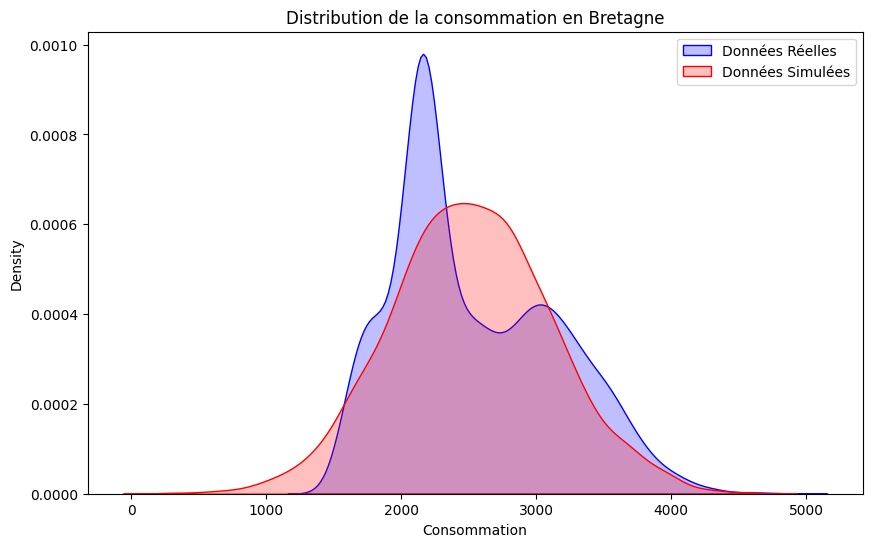

In [51]:
# Affichage des nouvelles données générées
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_bretagne.consumption, color='blue', label='Données Réelles', fill=True)
sns.kdeplot(data=donnees_simulees, color='red', label='Données Simulées', fill=True)

plt.title(f'Distribution de la consommation en {region}')
plt.xlabel('Consommation')
plt.legend()
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

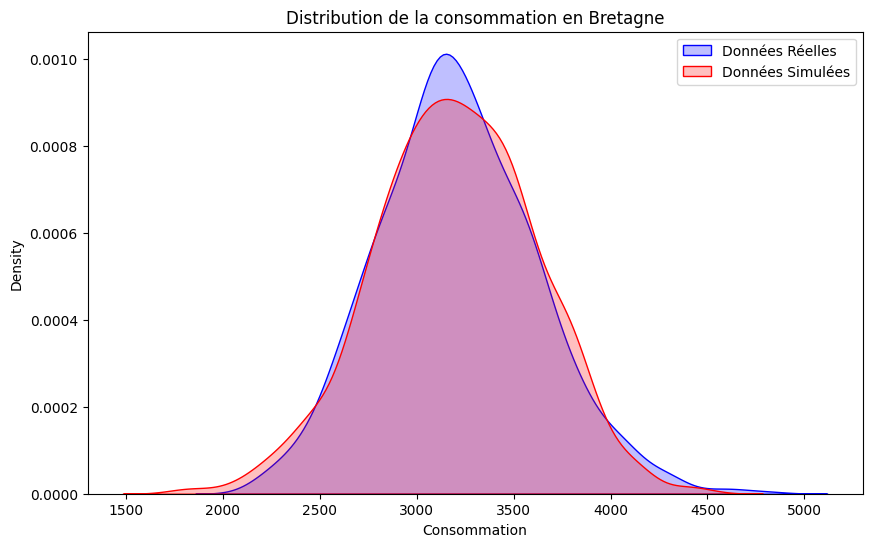

In [52]:
# Filtrer les jours d'hiver
df_bretagne_hiver = pd.DataFrame()
for year in range(2012, int(str(np.datetime64("now"))[:4])+1):
    df_bretagne_hiver = pd.concat([df_bretagne_hiver, df_bretagne[((df_region["date"] >= f"{year}-12-22")) & (df_region["date"] <= f"{year+1}-03-22")]])

moyenne_hiver = df_bretagne_hiver.consumption.sum() / df_bretagne_hiver.consumption.count()
variance_hiver = sum((x - moyenne_hiver) ** 2 for x in df_bretagne_hiver.consumption) / (df_bretagne_hiver.consumption.count() - 1)

# Génération de nouvelles données avec un modèle gaussien pour les jours d'hiver
donnees_simulees_hiver = norm.rvs(loc=moyenne_hiver, scale=np.sqrt(variance_hiver), size=df_bretagne_hiver.consumption.count())

# Affichage des nouvelles données générées
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_bretagne_hiver.consumption, color='blue', label='Données Réelles', fill=True)
sns.kdeplot(data=donnees_simulees_hiver, color='red', label='Données Simulées', fill=True)

plt.title(f'Distribution de la consommation en {region}')
plt.xlabel('Consommation')
plt.legend()
plt.show()


6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

L'hypothèse gaussienne serait plus appropriée en hiver, car la distribution des données est plus proche d'une distribution normale.

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

$$ 
d(f,g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx \leq \frac 1 2 \int |f(x)| \mathrm dx + \frac 1 2 \int |g(x)| \mathrm dx = \frac 1 2 + \frac 1 2 = 1
$$

Par positivité de l'intégrale, $d(f,g) \geq 0$.

D'où $d(f,g) \in [0,1]$.

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [53]:
# Calcul du KDE pour les données réelles de la Bretagne
kde_reelles_bretagne = gaussian_kde(df_bretagne.consumption)

# Calcul de la densité simulée
densite_simule = norm(loc=moyenne, scale=np.sqrt(variance)).pdf

# Calcul de la dissimilarité
x = np.linspace(0,2*df_region.consumption.max(),1000)
dissimilarite = 0.5*np.trapz(np.abs(kde_reelles_bretagne(x)-densite_simule(x)),x=x)
print(f"dissimilarité: {dissimilarite}")

dissimilarité: 0.17912439600616037


3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [54]:
# Calcul du KDE pour les données réelles de la Bretagne en hiver
kde_reelles_bretagne_hiver = gaussian_kde(df_bretagne_hiver.consumption)

# Calcul de la densité simulée pour l'hiver
densite_simule_hiver = norm(loc=moyenne_hiver, scale=np.sqrt(variance_hiver)).pdf

# Calcul de la dissimilarité
x = np.linspace(0,2*df_bretagne_hiver.consumption.max(),1000)
dissimilarite_hiver = 0.5*np.trapz(np.abs(kde_reelles_bretagne_hiver(x)-densite_simule_hiver(x)),x=x)
print(f"dissimilarité: {dissimilarite_hiver}")


dissimilarité: 0.031377652809277574


On observe que la dissimilarité est bien plus faible en hiver, donc que le modèle gaussien est plus adapté en hiver.

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [55]:
resultats = []

for region in regions:
    df_region = df[df.region == region]
    
    moyenne_region = df_region.consumption.sum() / df_region.consumption.count()
    variance_region = sum((x - moyenne_region) ** 2 for x in df_region.consumption) / (df_region.consumption.count() - 1)
    
    # Calcul du KDE pour les données réelles
    kde_reelles = gaussian_kde(df_region.consumption)

    # Calcul de la densité simulée
    densite_simule = norm(loc=moyenne_region, scale=np.sqrt(variance_region)).pdf

    # Calcul de la dissimilarité
    x = np.linspace(0,2*df_region.consumption.max(),1000)
    dissimilarite = np.trapz(np.abs(kde_reelles(x)-densite_simule(x)),x=x)

    # Filtrer les jours d'hiver
    df_region_hiver = pd.DataFrame()
    for year in range(2012, int(str(np.datetime64("now"))[:4])+1):
        df_region_hiver = pd.concat([df_region_hiver, df_region[((df_region["date"] >= f"{year}-12-22")) & (df_region["date"] <= f"{year+1}-03-22")]])

    moyenne_region_hiver = df_region_hiver.consumption.sum() / df_region_hiver.consumption.count()
    variance_region_hiver = sum((x - moyenne_region_hiver) ** 2 for x in df_region_hiver.consumption) / (df_region_hiver.consumption.count() - 1)

    # Calcul du KDE pour les données réelles en hiver
    kde_reelles_hiver = gaussian_kde(df_region_hiver.consumption)

    # Calcul de la densité simulée pour l'hiver
    densite_simule_hiver = norm(loc=moyenne_region_hiver, scale=np.sqrt(variance_region_hiver)).pdf

    # Calcul de la dissimilarité
    x = np.linspace(0,2*df_region_hiver.consumption.max(),5000)
    dissimilarite_hiver = 0.5*np.trapz(np.abs(kde_reelles_hiver(x)-densite_simule_hiver(x)),x=x)
    
    resultats.append({'Région': region, 'Dissimilarité': dissimilarite, 'Dissimilarité Hiver': dissimilarite_hiver})

resultats_df = pd.DataFrame(resultats)
print(resultats_df)


                        Région  Dissimilarité  Dissimilarité Hiver
0         Auvergne-Rhône-Alpes       0.336957             0.036495
1      Bourgogne-Franche-Comté       0.249101             0.036459
2                     Bretagne       0.358249             0.031378
3          Centre-Val de Loire       0.388121             0.042747
4                    Grand Est       0.230080             0.039332
5              Hauts-de-France       0.262916             0.027994
6                    Normandie       0.348584             0.043327
7           Nouvelle-Aquitaine       0.435217             0.053502
8                    Occitanie       0.445071             0.063370
9             Pays de la Loire       0.338277             0.039513
10  Provence-Alpes-Côte d'Azur       0.458718             0.033993
11               Île-de-France       0.348492             0.052517


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

Ce sont les Hauts-de-France qui ont le meilleur *fit* avec le modèle gaussien en hiver.

6. Pour cette région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

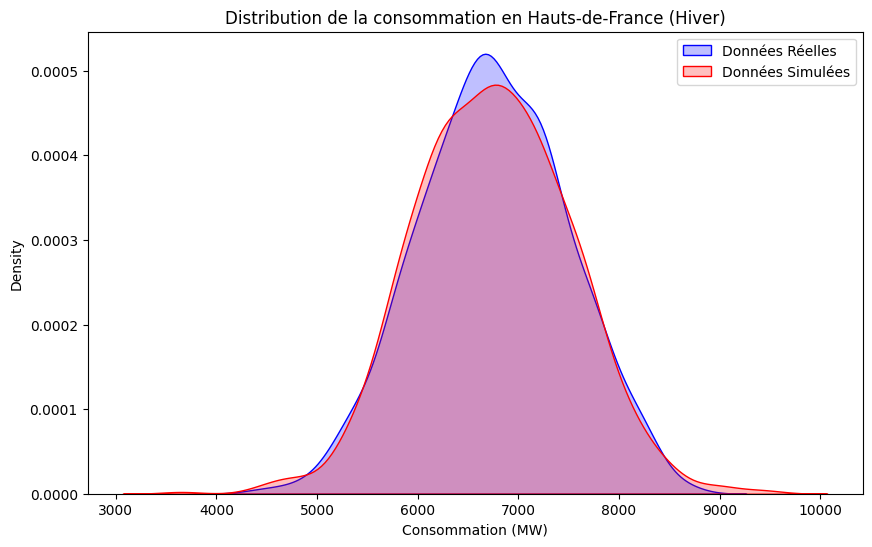

In [56]:
region = "Hauts-de-France"
df_region = df[df.region == region]

# Filtrer les jours d'hiver
df_region_hiver = pd.DataFrame()
for year in range(2012, int(str(np.datetime64("now"))[:4])+1):
    df_region_hiver = pd.concat([df_region_hiver, df_region[((df_region["date"] >= f"{year}-12-22")) & (df_region["date"] <= f"{year+1}-03-22")]])

moyenne_region_hiver = df_region_hiver.consumption.sum() / df_region_hiver.consumption.count()
variance_region_hiver = sum((x - moyenne_region_hiver) ** 2 for x in df_region_hiver.consumption) / (df_region_hiver.consumption.count() - 1)

# Calcul du KDE pour les données réelles en hiver
kde_reelles_hiver = gaussian_kde(df_region_hiver.consumption)

# Calcul de la densité simulée pour l'hiver
donnees_simulees_hiver = norm.rvs(loc=moyenne_region_hiver, scale=np.sqrt(variance_region_hiver), size=df_region_hiver.consumption.count())

# Calcul de la dissimilarité
x = np.linspace(df_region_hiver.consumption.min(),df_region_hiver.consumption.max(),1000)

# Tracé de la KDE des données réelles et générées sur le même graphique
plt.figure(figsize=(10, 6))
sns.kdeplot(df_region_hiver.consumption, color='blue', label='Données Réelles', fill=True)
sns.kdeplot(donnees_simulees_hiver, color='red', label='Données Simulées', fill=True)


plt.title(f'Distribution de la consommation en {region} (Hiver)')
plt.xlabel('Consommation (MW)')
plt.legend()
plt.show()


## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$ MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$ MW et l'écart-type $\sigma_0=500$ MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

La densité a priori pour $\mu$ est donnée par une loi normale avec une moyenne $\mu_0$ et un écart-type $\sigma_0$, et la vraisemblance des données, en supposant une loi normale avec écart-type connu $\sigma$, est donnée par une distribution normale avec une moyenne $\mu$ et l'écart-type $\sigma$.

La loi a posteriori pour $\mu$ est alors proportionnelle au produit de la densité a priori et de la vraisemblance des données. 

La densité a posteriori pour $\mu$ est donnée par la formule de Bayes :

$ p(\mu | x_1, x_2, \ldots, x_n) \propto p(\mu) \cdot p(x_1, x_2, \ldots, x_n | \mu) $

Sachant que $p(\mu) \propto \exp\left(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right)$ (loi normale) et $p(x_1, x_2, \ldots, x_n | \mu) \propto \exp\left(-\frac{\sum_{i=1}^{n}(x_i - \mu)^2}{2\sigma^2}\right)$ (loi normale avec écart-type connu), on peut exprimer la loi a posteriori proportionnelle à une loi normale avec une nouvelle moyenne et un nouvel écart-type.

La loi a posteriori pour $\mu$ est donc une loi normale avec une moyenne et un écart-type donnés par les formules suivantes :

$ \mu_ {\text post} = \frac {\frac \mu {\sigma_{0}^2} + \frac {\sum x} {\sigma^2}} {\frac 1 {\sigma_{0}^2} + \frac n {\sigma^2}} $


$ \sigma_{\text {post} }^2 = \frac {1} {\frac {1} {\sigma_0^2} + \frac n {\sigma^2}} $


2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [57]:
mu_0 = 3500  # Moyenne a priori
sigma_0 = 500  # Écart-type a priori
sigma = 400  # Écart-type connu

resultats_bayesiens = []

df_bretagne_hiver['date'] = pd.to_datetime(df_bretagne_hiver['date'], format='%Y-%m-%d')

for annee in range(2013, 2024):
    df_annee = df_bretagne_hiver[df_bretagne_hiver['date'].dt.year == annee]
    
    # Nombre d'observations pour cette année
    n = df_annee.shape[0]
    
    # Calcul des paramètres de la loi a posteriori
    mu_post = ((mu_0 / sigma_0**2) + (df_annee['consumption'].sum() / sigma**2)) / ((1 / sigma_0**2) + (n / sigma**2))
    sigma2_post = 1 / ((1 / sigma_0**2) + (n / sigma**2))
    
    resultats_bayesiens.append({'Année': annee, 'moyenne post': mu_post, 'variance post': sigma2_post})

resultats_bayesiens_df = pd.DataFrame(resultats_bayesiens)
print(resultats_bayesiens_df)


    Année  moyenne post  variance post
0    2013   3341.652117    1745.962462
1    2014   3112.811000    1745.962462
2    2015   3162.341772    1745.962462
3    2016   3207.135147    1727.115717
4    2017   3248.232213    1745.962462
5    2018   3318.321694    1745.962462
6    2019   3191.390223    1745.962462
7    2020   3139.011226    1727.115717
8    2021   3339.295068    1745.962462
9    2022   3158.402444    1745.962462
10   2023   3112.800098    1959.823616


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

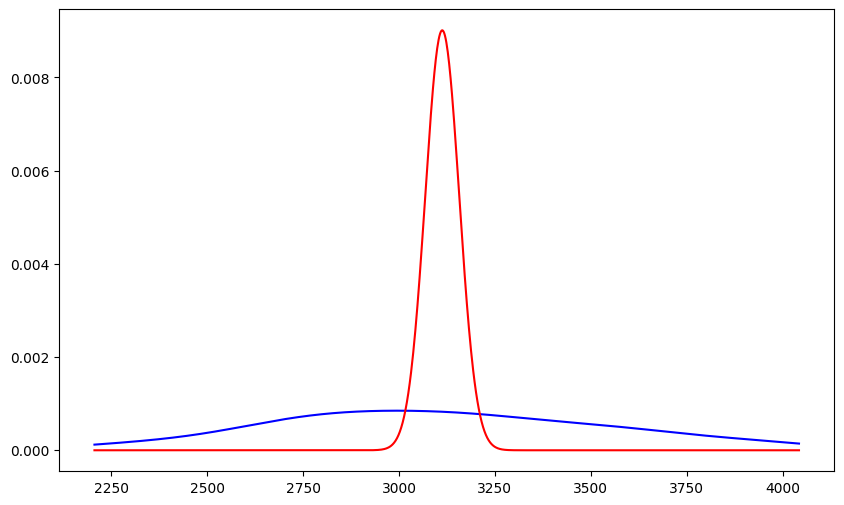

In [58]:
df_annee = df_bretagne_hiver[df_bretagne_hiver['date'].dt.year == 2023]

n = df_annee.consumption.count()
mu_post = ((mu_0 / sigma_0**2) + (df_annee['consumption'].sum() / sigma**2)) / ((1 / sigma_0**2) + (n / sigma**2))
sigma_post = np.sqrt(1 / ((1 / sigma_0**2) + (n / sigma**2)))

loi_post = norm(loc=mu_post, scale=sigma_post).pdf

kde_reelles = gaussian_kde(df_annee.consumption)

x = np.linspace(df_annee.consumption.min(),df_annee.consumption.max(),1000)

# Tracé de la KDE des données réelles et générées sur le même graphique
plt.figure(figsize=(10, 6))
plt.plot(x, kde_reelles(x), label='KDE Réelles', color='blue')
plt.plot(x, loi_post(x), label='Loi a posteriori', color='red')
plt.show()

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

On oberve que la densité de la loi a posteriori est très différente du *kde* des données réelles que la densité du modèle gaussien. On peut donc en conclure que la loi a posteriori est moins adaptée que le modèle gaussien obtenu dans la partie A.

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

On suppose que la consommation d'énergie en hiver suit une distribution normale avec une moyenne de 3200 MW et un écart-type de 500 MW. On souhaite tester l'hypothèse que l'écart-type est de 400 MW. On peut donc utiliser un test de Student pour tester cette hypothèse.

Nous souhaitons tester l’hypothèse $ H_0: \theta = \theta_0 = 500 $ contre $ H_1: \theta = \theta_1 = 400 $

Le rapport de vraisemblance est de la forme :

$$
Z(x_1,...,x_n) = \left(\frac{\theta_0}{\theta_1}\right)^{\frac{n}{2}} \exp \left(\left( \frac{1}{2\theta_1^2} - \frac{1}{2\theta_0^2} \right) \sum_{i=1}^n (x_i - \mu)^2 \right)
$$

L’événement $Z(x_1, . . . , x_n) > c$ est équivalent à $\sum_{i=1}^n (x_i - \mu)^2 > d$ pour un $d$ convenablement choisi. Pour déterminer le seuil d, nous devons donc résoudre l’équation :

$$
P\left(\sum_{i=1}^n \left(\frac{(x_i - \mu)}{\theta_0}\right)^2 > \frac{d}{\theta_0^2}\right) = \alpha
$$

Comme $\sum_{i=1}^n \frac{(x_i - \mu)^2}{\theta_0}$ est distribué suivant une loi du $\chi^2$ centré à $n$ degré de liberté, on peut déterminer $\frac{d}{\theta_0^2}$ à partir des quantiles de cette loi. Enfin, le test rejette $H_0$ lorsque $\sum_{i=1}^n (x_i - \mu)^2 \leq d$


2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [59]:
df_bretagne.loc[:,"date"] = pd.to_datetime(df_bretagne['date'], format='%Y-%m-%d')
data_observe = df_bretagne[
    (df_bretagne["date"] >= pd.to_datetime("2023-01-01", format="%Y-%m-%d")) & (df_bretagne["date"] < pd.to_datetime("2024-01-01", format="%Y-%m-%d"))
]["consumption"]

sigma_h0 = 500 
sigma_h1 = 400
mu = 3200

n = len(data_observe) 

alpha = 0.01

critical_value = chi2.ppf(alpha, n) * sigma_h0**2

chi_squared_statistic = sum([(x-mu)**2 for x in data_observe])

print(f"seuil = {critical_value} \nsomme = {chi_squared_statistic}")

if chi_squared_statistic <= critical_value:
    print("On rejette l'hypothèse nulle.")
else:
    print("On accepte l'hypothèse nulle.")


seuil = 28383360.485034663 
somme = 84784257
On accepte l'hypothèse nulle.


## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

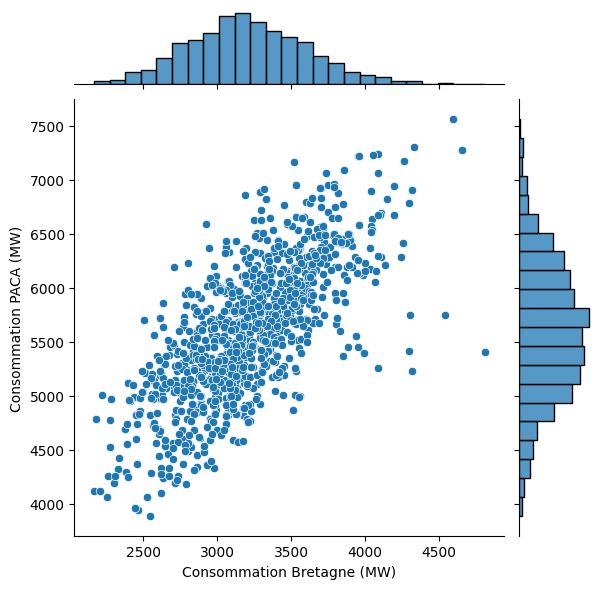

In [60]:
df_paca = df[(df['region'] == "Provence-Alpes-Côte d'Azur")]
df_paca_hiver = pd.DataFrame()
for year in range(2012, int(str(np.datetime64("now"))[:4])+1):
    df_paca_hiver = pd.concat([df_paca_hiver, df_paca[((df_paca["date"] >= f"{year}-12-22")) & (df_paca["date"] <= f"{year+1}-03-22")]])
df_paca_hiver['date'] = pd.to_datetime(df_paca_hiver['date'], format='%Y-%m-%d')


df_joint = pd.merge(df_paca_hiver, df_bretagne_hiver, on='date', suffixes=('_paca', '_bretagne'))

sns.jointplot(data=df_joint, x="consumption_bretagne", y="consumption_paca")

plt.xlabel('Consommation Bretagne (MW)')
plt.ylabel('Consommation PACA (MW)')

plt.show()

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Il semble que les consommations de ces régions ne sont pas indépendantes. En effet, on observe que les consommations sont plus élevées dans les deux régions en même temps, et plus faibles dans les deux régions en même temps.

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

Notons $O_{i,j}$ l'effectif observé de données pour lesquelles $X$ prend la valeur $i$ et $Y$ la valeur $j$. Sous l'hypothèse d'indépendance, on s'attend à une valeur espérée $E_{i,j}$ définie comme suit :

$ E_{i,j} = \frac {O_{i+} O_{+j}} {n} $

où \
\
$O_{i+} = \sum_{j} O_{i,j}$ \
$O_{+j} = \sum_{i} O_{i,j}$ 

On calcul:

$ T = \sum_{i,j} {\frac {(O_{i,j}-E_{i,j})^2} {E_{i,j}}} $ 

Puis:

$ k = (r-1)*(c-1) $

Avec $r$ le nombre de lignes et $c$ le nombre de colonnes

On rejette l'hypothèse nulle si $T > \chi^2(\alpha,k)$

4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [61]:
consumption_bins = np.unique(df_joint['consumption_paca'].values)
consumption_bins = np.append(consumption_bins, df_joint['consumption_bretagne'].values)
consumption_bins = np.sort(np.unique(consumption_bins))

df_joint['consumption_bin_paca'] = pd.cut(df_joint['consumption_paca'], bins=consumption_bins)
df_joint['consumption_bin_bretagne'] = pd.cut(df_joint['consumption_bretagne'], bins=consumption_bins)

contingency_table = pd.crosstab(df_joint['consumption_bin_paca'], df_joint['consumption_bin_bretagne'])

observed_frequencies = contingency_table.values
row_totals = contingency_table.sum(axis=1)
col_totals = contingency_table.sum(axis=0)
total_obs = df_joint.shape[0]

expected_frequencies = np.outer(row_totals, col_totals) / total_obs

chi2_statistic = np.sum((observed_frequencies - expected_frequencies)**2 / expected_frequencies)
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)

alpha = 0.01

critical_value = chi2.ppf(1-alpha, degrees_of_freedom)

print(f"T = {chi2_statistic} \nvaleur critique = {critical_value}")
if chi2_statistic > critical_value:
    print("La consommation en PACA et Bretagne ne sont pas indépendants.")
else:
    print("La consommation en PACA et Bretagne semble être indépendants.")


T = 592972.7093403825 
valeur critique = 588922.2800401263
La consommation en PACA et Bretagne ne sont pas indépendants.


## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

In [62]:
from scipy.stats import t

data = df_bretagne_hiver['consumption']

n = len(data)

mu = sum(data) / n
var = sum([(x-mu)**2 for x in data]) / (n-1)

alpha = 0.95

t_n = t.ppf(1-alpha/2, n-1)

m = mu - t_n * np.sqrt(var/n)
M = mu + t_n * np.sqrt(var/n)

print(f"Intervalle de confiance pour alpha={(alpha)*100}% : [{m}, {M}]")

Intervalle de confiance pour alpha=95.0% : [3210.007073790195, 3211.6384448402177]


2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

In [63]:
from scipy.stats import ttest_1samp

# Sélection des données pour la région
df_region = df[df.region == "Bretagne"]
df_bretagne_hiver_2023 = df_region[(df_region["date"] >= f"2023-12-22") | ((df_region["date"] <= f"2023-03-22") & (df_region["date"] >= f"2023-01-01"))]

hypothesized_mean = 3100

t_statistic, p_value = ttest_1samp(df_bretagne_hiver_2023.consumption, popmean=hypothesized_mean)

alpha = 0.05

print(f"p_value = {p_value}")
if p_value < alpha:
    print(f"On rejette l'hypothèse nulle. La consommation moyenne en hiver 2023 est différente de {hypothesized_mean} MW.")
else:
    print(f"On accepte l'hypothèse nulle. La consommation moyenne en hiver 2023 est égale à {hypothesized_mean} MW.")


p_value = 0.8354711137337801
On accepte l'hypothèse nulle. La consommation moyenne en hiver 2023 est égale à 3100 MW.
